<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats

In [28]:
plot_format = 'png'

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [29]:
df = pd.read_csv("dst-3.0_16_1_hh_database.csv", sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [30]:
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [31]:
df.info(), df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

(None,
 Пол, возраст                       44744
 ЗП                                 44744
 Ищет работу на должность:          44744
 Город, переезд, командировки       44744
 Занятость                          44744
 График                             44744
 Опыт работы                        44576
 Последнее/нынешнее место работы    44743
 Последняя/нынешняя должность       44742
 Образование и ВУЗ                  44744
 Обновление резюме                  44744
 Авто                               44744
 dtype: int64)

5. Выведите основную статистическую информацию о столбцах.


In [32]:
df.describe(include='all')

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [33]:
def extract_education(value):
    if pd.isna(value):
        return np.nan
    first_two_words = " ".join(value.split()[:2])  # Берём первые два слова
    if "Высшее" in first_two_words:
        return "высшее"
    elif "Неоконченное высшее" in first_two_words:
        return "неоконченное высшее"
    elif "Среднее специальное" in first_two_words:
        return "среднее специальное"
    elif "Среднее" in first_two_words:
        return "среднее"
    else:
        return np.nan

    # Создание нового признака "Образование"
df['Образование'] = df['Образование и ВУЗ'].apply(extract_education)

df = df.drop(columns=['Образование и ВУЗ'])
df

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее
...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [34]:
def parse_gender_age(value):
    if pd.isna(value):
        return np.nan, np.nan
    parts = value.split(',')
    gender = parts[0].strip()
    age = int(parts[1].strip().split()[0])

    if gender == 'Мужчина':
        gender = 'М'
    elif gender == 'Женщина':
        gender = 'Ж'
    else:
        gender = np.nan
    
    return gender, age

# Применяем функцию и создаём новые признаки
df[['Пол', 'Возраст']] = df['Пол, возраст'].apply(lambda x: pd.Series(parse_gender_age(x)))

# Проверка результата
print("Уникальные значения в столбце 'Пол':", df['Пол'].unique())
print("Тип данных и первые строки в столбце 'Возраст':")
print(df['Возраст'].dtype, df['Возраст'].head())

# Удаление исходного столбца
df = df.drop(columns=['Пол, возраст'])

df


Уникальные значения в столбце 'Пол': ['М' 'Ж']
Тип данных и первые строки в столбце 'Возраст':
int64 0    39
1    60
2    36
3    38
4    26
Name: Возраст, dtype: int64


,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30
44740,39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27
44741,40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48
44742,20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [35]:
def calculate_experience(value):
    # Обрабатываем пропуски
    if pd.isna(value) or value == "Не указано":
        return np.nan

    # Ключевые слова
    year_keywords = ['год', 'года', 'лет']
    month_keywords = ['месяц', 'месяца', 'месяцев']

    # Разбиваем строку на слова
    words = value.split("  ")[0].split()
    years = 0
    months = 0

    # Поиск количества лет
    for i, word in enumerate(words):
        if word in year_keywords:
            try:
                years = int(words[i - 1])
                break
            except (ValueError, IndexError):
                years = 0

    # Поиск количества месяцев
    for i, word in enumerate(words):
        if word in month_keywords:
            try:
                months = int(words[i - 1])
                break
            except (ValueError, IndexError):
                months = 0

    # Конвертируем годы в месяцы и возвращаем общий опыт
    return years * 12 + months

# Применение функции к столбцу "Опыт работы"
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(calculate_experience)

# Проверка результата
print("Первые строки нового столбца 'Опыт работы (месяц)':")
print(df[['Опыт работы', 'Опыт работы (месяц)']].head())

# Удаление столбца "Опыт работы"
df = df.drop(columns=['Опыт работы'])

df


Первые строки нового столбца 'Опыт работы (месяц)':
                                         Опыт работы  Опыт работы (месяц)
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...                202.0
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...                233.0
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...                123.0
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...                225.0
4  Опыт работы 5 лет 7 месяцев  Региональный мене...                 67.0


,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц)
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0
44740,39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0
44741,40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0
44742,20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [36]:
million_cities = [
    'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 
    'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
    'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
]

# Функция для обработки строки
def parse_city_relocation_travel(value):
    if pd.isna(value):
        return "другие", False, False  # Пропуски обрабатываются как "другие", False, False
    
    parts = value.split(', ')  # Разделяем строку по запятой
    city = parts[0].strip()
    
    # Классификация города
    if city == 'Москва':
        city = 'Москва'
    elif city == 'Санкт-Петербург':
        city = 'Санкт-Петербург'
    elif city in million_cities:
        city = 'город-миллионник'
    else:
        city = 'другие'
    
    # Готовность к переезду
    relocation = any(
        phrase in value.lower() for phrase in ['готов к переезду', 'готова к переезду', 'хочу переехать']
    ) and not any(
        phrase in value.lower() for phrase in ['не готов к переезду', 'не готова к переезду']
    )
    
    # Готовность к командировкам
    travel = any(
        phrase in value.lower() for phrase in ['готов к командировкам', 'готова к командировкам']
    ) and not any(
        phrase in value.lower() for phrase in ['не готов к командировкам', 'не готова к командировкам']
    )
    
    return city, relocation, travel

df[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = df['Город, переезд, командировки'].apply(
    lambda x: pd.Series(parse_city_relocation_travel(x))
)

# Проверка результата
print(df[['Город', 'Готовность к переезду', 'Готовность к командировкам']].head())

# Удаление столбца "Город, переезд, командировки"
df = df.drop(columns=['Город, переезд, командировки'])

df


    Город  Готовность к переезду  Готовность к командировкам
0  другие                  False                       False
1  другие                  False                       False
2  другие                  False                       False
3  другие                  False                       False
4  Москва                  False                        True


,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,False,False
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,другие,False,False
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,Москва,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,другие,True,True
44740,39000 руб.,"Системный администратор, IT-специалист","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,другие,True,True
44741,40000 руб.,"Аналитик данных, Математик",полная занятость,"полный день, удаленная работа","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0,город-миллионник,True,False
44742,20000 руб.,Контент-менеджер,"частичная занятость, полная занятость",удаленная работа,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0,другие,False,False


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [37]:
# Категории занятости и графика
employment_categories = [
    "полная занятость", "частичная занятость", "проектная работа", 
    "волонтерство", "стажировка"
]

schedule_categories = [
    "полный день", "сменный график", "гибкий график", 
    "удаленная работа", "вахтовый метод"
]

# Создание бинарных признаков для "Занятость"
for category in employment_categories:
    df[category] = df['Занятость'].str.contains(category, regex=False).fillna(False)

# Создание бинарных признаков для "График"
for category in schedule_categories:
    df[category] = df['График'].str.contains(category, regex=False).fillna(False)

# Удаление исходных столбцов
df = df.drop(columns=['Занятость', 'График'])

df


,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,...,True,True,True,False,False,True,True,True,True,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,...,True,False,False,False,False,True,False,False,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,...,True,True,True,False,False,False,False,True,True,False
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,22.04.2019 12:32,Не указано,высшее,М,30,91.0,...,True,False,False,False,False,True,False,False,True,False
44740,39000 руб.,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,22.04.2019 13:11,Не указано,высшее,М,27,84.0,...,True,True,True,False,False,True,True,True,True,False
44741,40000 руб.,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,09.04.2019 05:07,Не указано,высшее,Ж,48,257.0,...,True,False,False,False,False,True,False,False,True,False
44742,20000 руб.,Контент-менеджер,IQ-Maxima,Менеджер проектов,26.04.2019 14:25,Имеется собственный автомобиль,высшее,М,24,46.0,...,True,True,False,False,False,False,False,False,True,False


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [38]:
exchange_rates = pd.read_csv('ExchangeRates.csv', sep=',')
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], dayfirst=True, errors='coerce')


df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], format='%d.%m.%Y %H:%M', errors='coerce')
df['date'] = pd.to_datetime(df['Обновление резюме'].dt.date, errors='coerce')
# Приведение 'date' в exchange_rates к типу datetime64[ns]
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'])

currency_mapping = {
    'грн': 'UAH', 'USD': 'USD', 'EUR': 'EUR', 'белруб': 'BYN', 
    'KGS': 'KGS', 'сум': 'UZS', 'AZN': 'AZN', 'KZT': 'KZT', 'руб': 'RUB'
}
# Функция для разбора зарплаты и валюты
def parse_salary(salary):
    if pd.isna(salary):
        return np.nan, np.nan
    parts = salary.split(" ")
    try:
        value = float(parts[0])
        currency = parts[1].replace(".", "")
        currency = currency_mapping.get(currency, None)
        return value, currency
    except:
        return np.nan, np.nan

df[['ЗП сумма', 'Валюта']] = df['ЗП'].apply(lambda x: pd.Series(parse_salary(x)))

exchange_rates['close'] = exchange_rates['close'].fillna(1)  # Рубли как 1
df = df.merge(exchange_rates, how='left', left_on=['date', 'Валюта'], right_on=['date', 'currency'])
df['ЗП (руб)'] = df.apply(
    lambda row: row['ЗП сумма'] if row['Валюта'] == 'RUB' 
    else (row['ЗП сумма'] * row['close']) / row['proportion'] if not pd.isna(row['close'])
    else np.nan, 
    axis=1
)

df = df.drop(columns=['ЗП', 'ЗП сумма', 'Валюта', 'currency', 'close', 'proportion', 'per', 'time', 'vol', 'date'])

df

/var/folders/c0/vb56z7154b5fq8w1p402t34h0000gp/T/ipykernel_60493/729723225.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16 15:59:00,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12 08:42:00,Не указано,высшее,М,60,233.0,другие,...,True,True,False,False,True,True,True,True,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16 08:35:00,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,True,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08 14:23:00,Не указано,высшее,М,38,225.0,другие,...,True,True,False,False,False,False,True,True,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22 10:32:00,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,False,True,False,False,False,False,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22 12:32:00,Не указано,высшее,М,30,91.0,другие,...,False,False,False,False,True,False,False,True,False,50000.0
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22 13:11:00,Не указано,высшее,М,27,84.0,другие,...,True,True,False,False,True,True,True,True,False,39000.0
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-04-09 05:07:00,Не указано,высшее,Ж,48,257.0,город-миллионник,...,False,False,False,False,True,False,False,True,False,40000.0
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26 14:25:00,Имеется собственный автомобиль,высшее,М,24,46.0,другие,...,True,False,False,False,False,False,False,True,False,20000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Аномалии в данных имеются, например значения в возрасте 100.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

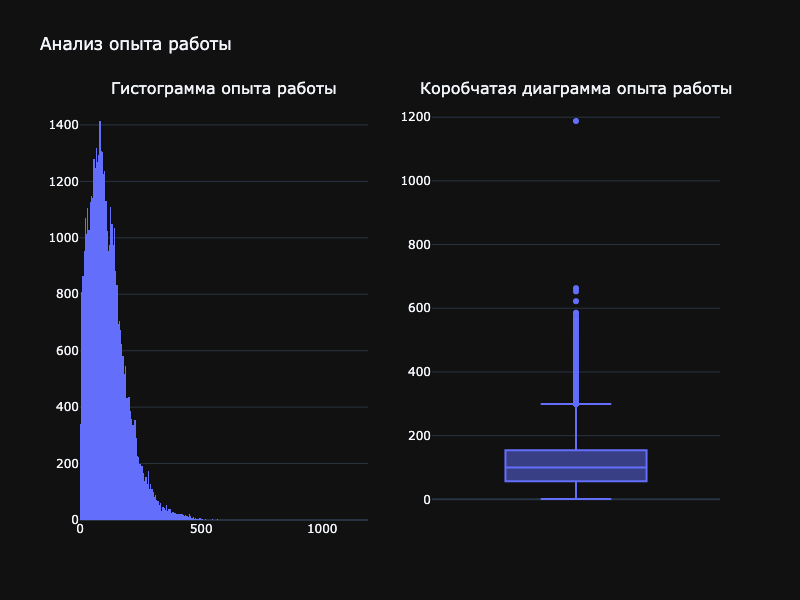

Мода распределения: 81.0
Минимальное значение опыта работы: 1.0
Максимальное значение опыта работы: 1188.0
Первый квартиль: 57.0
Третий квартиль: 154.0
IQR: 97.0


In [39]:
# Гистограмма
hist_fig = px.histogram(df, x="Опыт работы (месяц)", title="Гистограмма опыта работы")

# Коробчатая диаграмма
box_fig = px.box(df, y="Опыт работы (месяц)", title="Коробчатая диаграмма опыта работы")

# Объединяем оба графика в один ряд
fig = make_subplots(rows=1, cols=2, subplot_titles=["Гистограмма опыта работы", "Коробчатая диаграмма опыта работы"])
fig.add_trace(hist_fig.data[0], row=1, col=1)
fig.add_trace(box_fig.data[0], row=1, col=2)

fig.update_layout(height=600, width=800, title_text="Анализ опыта работы")
fig.show(plot_format)

experience_mode = df["Опыт работы (месяц)"].mode()[0]
print(f"Мода распределения: {experience_mode}")

min_experience = df["Опыт работы (месяц)"].min()
max_experience = df["Опыт работы (месяц)"].max()
print(f"Минимальное значение опыта работы: {min_experience}")
print(f"Максимальное значение опыта работы: {max_experience}")

q1 = df["Опыт работы (месяц)"].quantile(0.25)
q3 = df["Опыт работы (месяц)"].quantile(0.75)
iqr = q3 - q1
print(f"Первый квартиль: {q1}")
print(f"Третий квартиль: {q3}")
print(f"IQR: {iqr}")

Явным выбросом является значение 1188

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


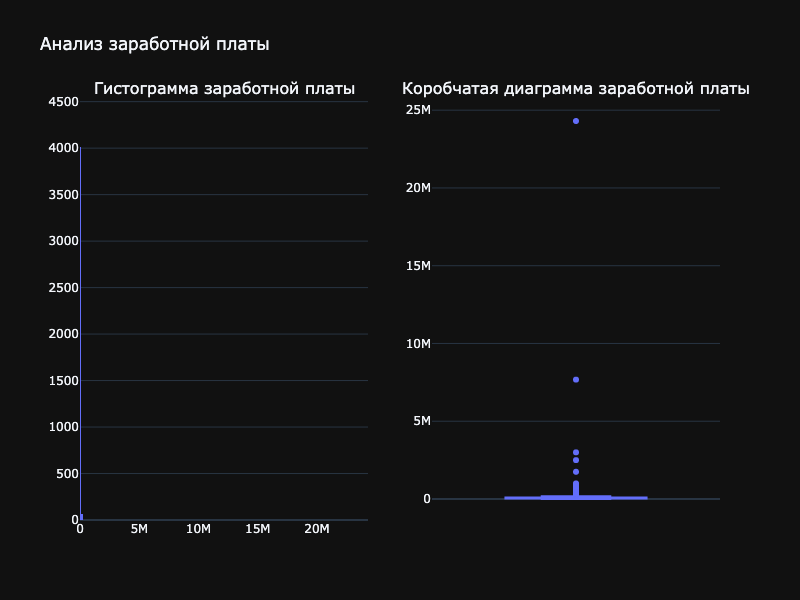

Минимальная зарплата: 1.0
Максимальная зарплата: 24304876.0
Первый квартиль: 37082.2
Третий квартиль: 95000.0
IQR: 57917.8


In [40]:
# Гистограмма
hist_fig = px.histogram(df, x="ЗП (руб)", title="Гистограмма заработной платы")

# Коробчатая диаграмма
box_fig = px.box(df, y="ЗП (руб)", title="Коробчатая диаграмма заработной платы")

# Объединяем оба графика в один ряд
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=["Гистограмма заработной платы", "Коробчатая диаграмма заработной платы"])
fig.add_trace(hist_fig.data[0], row=1, col=1)
fig.add_trace(box_fig.data[0], row=1, col=2)

fig.update_layout(height=600, width=800, title_text="Анализ заработной платы")
fig.show(plot_format)

min_salary = df["ЗП (руб)"].min()
max_salary = df["ЗП (руб)"].max()
print(f"Минимальная зарплата: {min_salary}")
print(f"Максимальная зарплата: {max_salary}")

q1 = df["ЗП (руб)"].quantile(0.25)
q3 = df["ЗП (руб)"].quantile(0.75)
iqr = q3 - q1
print(f"Первый квартиль: {q1}")
print(f"Третий квартиль: {q3}")
print(f"IQR: {iqr}")


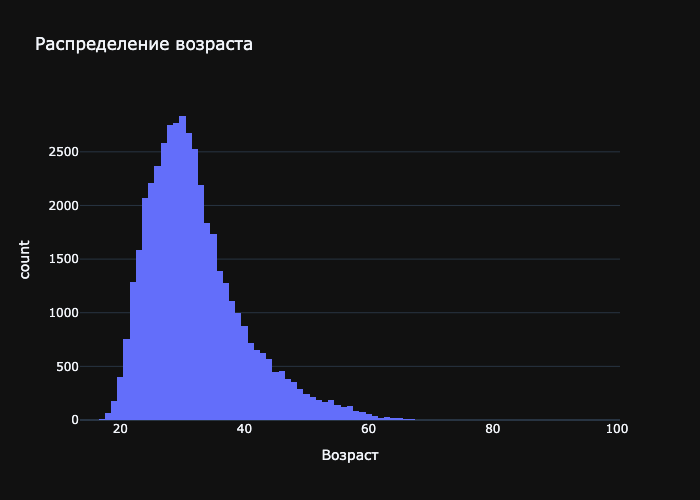

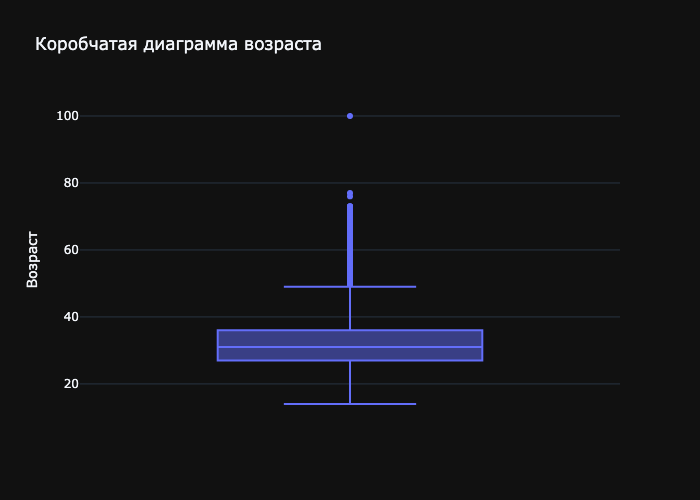

Мода распределения: 30
Минимальный возраст: 14, максимальный возраст: 100
Первый квартиль: 27.0, третий квартиль: 36.0, IQR: 9.0


In [41]:
fig = px.histogram(df, x='Возраст', title='Распределение возраста')
fig.show(plot_format)

box_fig = px.box(df, y='Возраст', title='Коробчатая диаграмма возраста')
box_fig.show(plot_format)

age_mode = df['Возраст'].mode()[0]
print(f'Мода распределения: {age_mode}')

min_age = df['Возраст'].min()
max_age = df['Возраст'].max()
print(f'Минимальный возраст: {min_age}, максимальный возраст: {max_age}')

q1 = df['Возраст'].quantile(0.25)
q3 = df['Возраст'].quantile(0.75)
iqr = q3 - q1
print(f'Первый квартиль: {q1}, третий квартиль: {q3}, IQR: {iqr}')


В данных есть явный выбросы значений: 7 и 24 млн. Также я считаю, что есть неявные выбросы, которые лежат в нормальных значениях, но зарплата не соответствует должности. Например `Chief AI Officer` в теории может получать 2.5 млн рублей в месяц, а `Project manager` 1.75 млн скорее всего не может.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

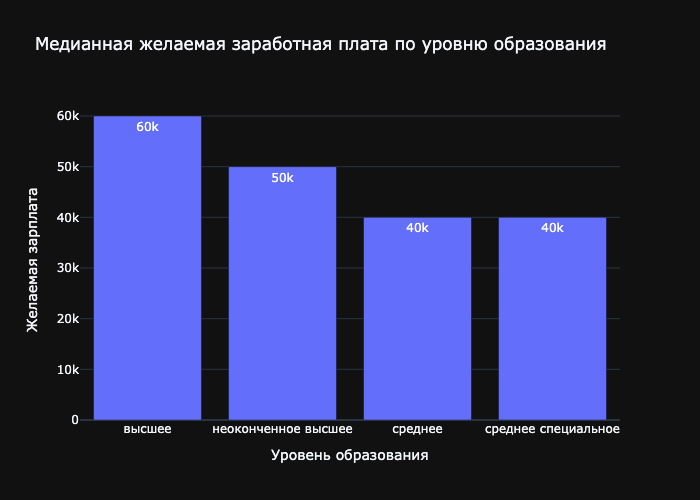

In [42]:
filtered_df = df.query("`ЗП (руб)` < 1000000")

grouped = filtered_df.groupby("Образование")[["ЗП (руб)"]].median().reset_index()

fig = px.bar(grouped, x="Образование", y="ЗП (руб)", text_auto=True,
             title="Медианная желаемая заработная плата по уровню образования",
             labels={"Образование": "Уровень образования", "ЗП (руб)": "Желаемая зарплата"})
fig.show(plot_format)

# Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?
Наибольший для высшего образования, наименьшая зп у среднего и среде специального

# Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?
Да, так уровень образования прямо пропорционально влияет на уровень зп

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

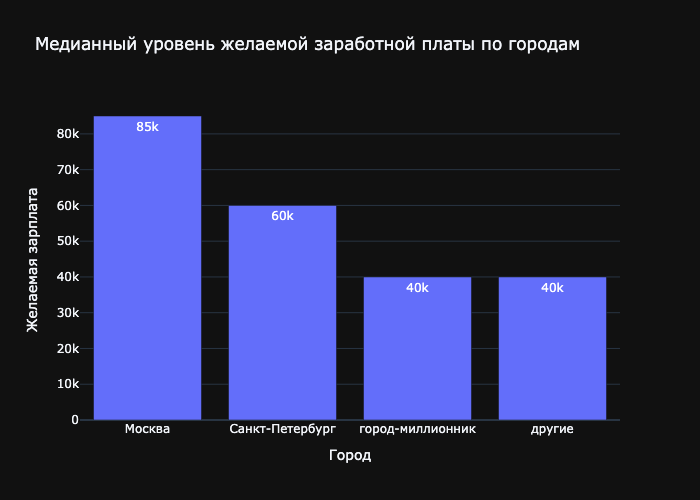

In [43]:
grouped = filtered_df.groupby("Город")[["ЗП (руб)"]].median().reset_index()

# Строим диаграмму
fig = px.bar(grouped, x="Город", y="ЗП (руб)",
             title="Медианный уровень желаемой заработной платы по городам",
             labels={"Город": "Город", "ЗП (руб)": "Желаемая зарплата"},
             hover_data=['Город'], text_auto=True)

fig.show(plot_format)

# как соотносятся медианные уровни желаемой заработной платы и их размах в городах?

Как и ожидалось в Москве и в СПБ самые большие ожидания по ЗП. В СПБ хотят на 50% больше чем в остальных городах(кроме Москвы), в Москве хотят более чем в 2 раза больше чем в остальных городах(кроме СПБ)

# Как вы считаете, важен ли признак города при прогнозировании заработной платы?
Да, тк если кандидат из Москвы или СПБ, то его ожидания будут больше

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

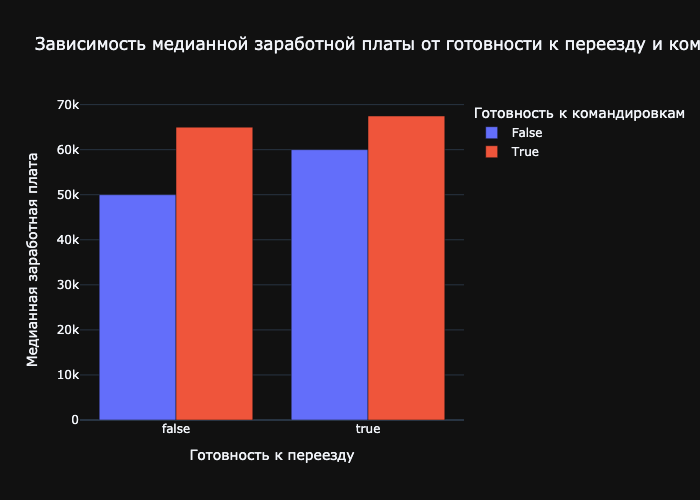

In [44]:
# Группируем данные по признакам "Готовность к переезду" и "Готовность к командировкам"
grouped = filtered_df.groupby(["Готовность к переезду", "Готовность к командировкам"])["ЗП (руб)"].median().reset_index()

# Создаем многоуровневую столбчатую диаграмму
fig = px.bar(
    grouped,
    x="Готовность к переезду",
    y="ЗП (руб)",
    color="Готовность к командировкам",
    barmode="group",
    title="Зависимость медианной заработной платы от готовности к переезду и командировкам",
    labels={
        "Готовность к переезду": "Готовность к переезду",
        "Готовность к командировкам": "Готовность к командировкам",
        "ЗП (руб)": "Медианная заработная плата"
    }
)

fig.show(plot_format)

Как видно по графику готовность к переезду и готовность к командировкам оказывает влияние на уровень ЗП. Главным образом на зп влияет готовность к командировкам. Разница между людьми не готовыми к переезду и к командировкам и тех, кто готов ко всему, достигает почти 35% поэтому считаю, что это также важный признак для прогнозирования.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

/var/folders/c0/vb56z7154b5fq8w1p402t34h0000gp/T/ipykernel_60493/1258623089.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/c0/vb56z7154b5fq8w1p402t34h0000gp/T/ipykernel_60493/1258623089.py:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



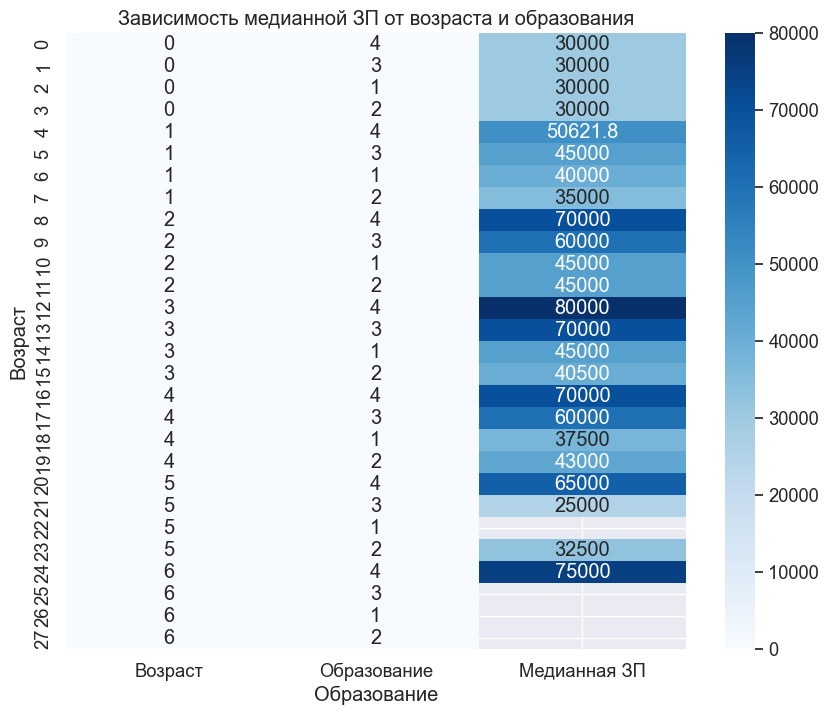

,Возраст,Образование,Медианная ЗП
0,0,4,30000.00
1,0,3,30000.00
2,0,1,30000.00
3,0,2,30000.00
4,1,4,50621.85
5,1,3,45000.00
6,1,1,40000.00
7,1,2,35000.00
8,2,4,70000.00
9,2,3,60000.00


In [45]:
# Создание сводной таблицы
bins = [0, 20, 30, 40, 50, 60, 70, 80]

grouped = df.groupby([pd.cut(df['Возраст'], bins=bins), 'Образование'])
summary_table = grouped['ЗП (руб)'].agg(['median']).reset_index()
summary_table['Образование'] = summary_table['Образование'].replace({'среднее': 1, 'среднее специальное': 2, 'неоконченное высшее': 3, 'высшее': 4})
summary_table.columns = ['Возраст', 'Образование', 'Медианная ЗП']

def change_age(x):
    x = x.left
    if x == 0:
        return 0
    elif x == 20:
        return 1
    elif x == 30:
        return 2
    elif x == 40:
        return 3
    elif x == 50:
        return 4
    elif x == 60:
        return 5
    elif x == 70:
        return 6
    elif x == 80:
        return 7
    else:
        return 8
    
# Замена диапазонов на числовые значения
summary_table['Возраст'] = summary_table['Возраст'].apply(lambda x: change_age(x))

# Построение тепловой карты
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(summary_table, cmap='Blues', annot=True, fmt='g')
ax.set_title('Зависимость медианной ЗП от возраста и образования')
ax.set_xlabel('Образование')
ax.set_ylabel('Возраст')

plt.show()

summary_table

По построенной тепловой карте мы видим тоже, что в видели когда анализировали зависимость зп от возраста и образования отдельно. Самые высокие зарплатные ожидания у людей в возрасте от 40 до 50 с высшим образованием.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

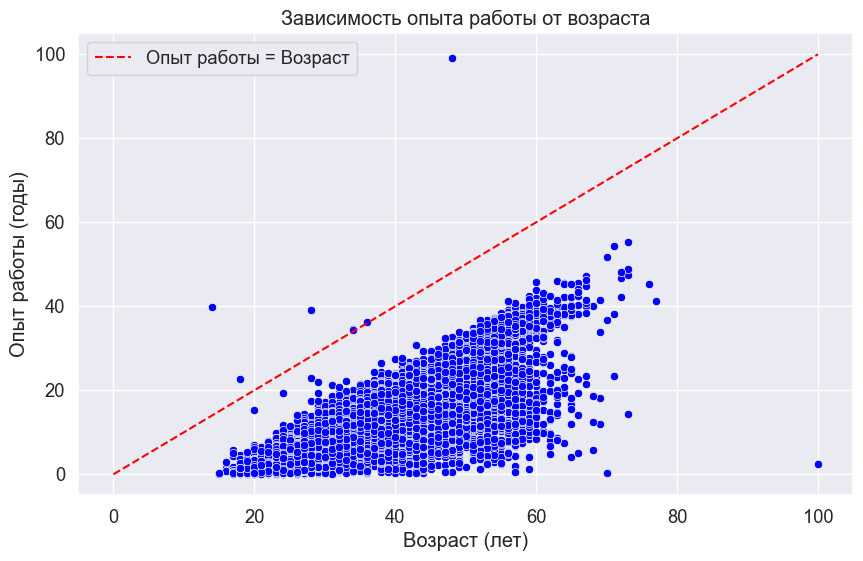

In [46]:
df['Опыт работы (годы)'] = df['Опыт работы (месяц)'] / 12

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Возраст', 
    y='Опыт работы (годы)', 
    color='blue'
)
plt.plot(
    [0, 100], 
    [0, 100], 
    color='red', 
    linestyle='--', 
    label='Опыт работы = Возраст'
)
plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст (лет)')
plt.ylabel('Опыт работы (годы)')
plt.legend()
plt.show()

По построенной диаграмме видим 7 аномальных значений

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


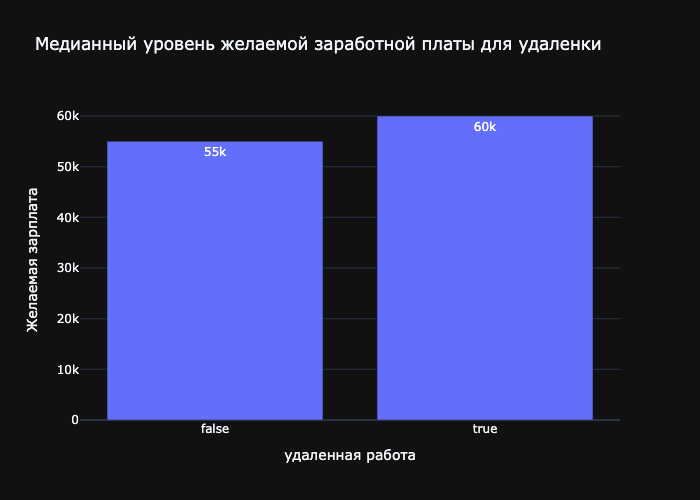

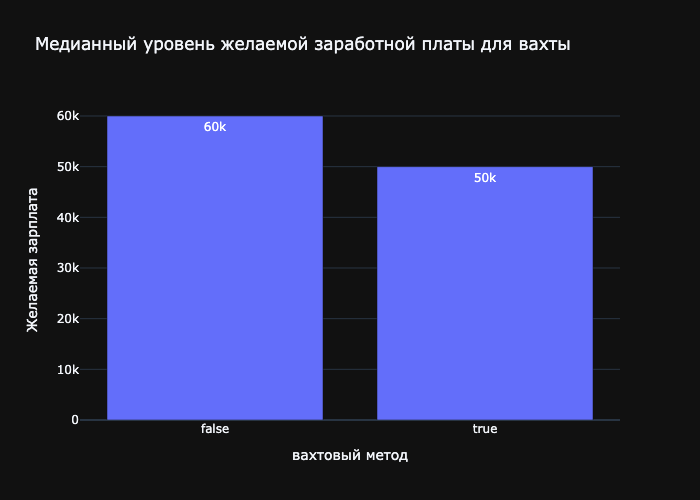

In [47]:
grouped = filtered_df.groupby("удаленная работа")[["ЗП (руб)"]].median().reset_index()

# Строим диаграмму
fig = px.bar(grouped, x="удаленная работа", y="ЗП (руб)",
             title="Медианный уровень желаемой заработной платы для удаленки",
             labels={"удаленная работа": "удаленная работа", "ЗП (руб)": "Желаемая зарплата"},
             hover_data=['удаленная работа'], text_auto=True)

fig.show(plot_format)

grouped = filtered_df.groupby("вахтовый метод")[["ЗП (руб)"]].median().reset_index()

# Строим диаграмму
fig = px.bar(grouped, x="вахтовый метод", y="ЗП (руб)",
             title="Медианный уровень желаемой заработной платы для вахты",
             labels={"вахтовый метод": "вахтовый метод", "ЗП (руб)": "Желаемая зарплата"},
             hover_data=['вахтовый метод'], text_auto=True)

fig.show(plot_format)

По построенным данным можно заметить, что на удаленке незначительно ожидания больше.
Люди, готовые работать вахтовым методом ожидают меньшую зп.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [48]:
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме']).dt.date
clean_df = df.drop_duplicates()

clean_df

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (годы)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,False,False,True,True,True,True,True,29000.0,16.833333
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,другие,...,True,False,False,True,True,True,True,False,40000.0,19.416667
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,True,False,False,False,False,20000.0,10.250000
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,высшее,М,38,225.0,другие,...,True,False,False,False,False,True,True,False,100000.0,18.750000
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,True,False,False,False,False,140000.0,5.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,высшее,М,30,91.0,другие,...,False,False,False,True,False,False,True,False,50000.0,7.583333
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,высшее,М,27,84.0,другие,...,True,False,False,True,True,True,True,False,39000.0,7.000000
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-04-09,Не указано,высшее,Ж,48,257.0,город-миллионник,...,False,False,False,True,False,False,True,False,40000.0,21.416667
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,высшее,М,24,46.0,другие,...,False,False,False,False,False,False,True,False,20000.0,3.833333


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [49]:
missing_values_count = clean_df.isna().sum()

missing_values_count

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
Опыт работы (годы)                 168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [50]:
mask = ~clean_df[["Последнее/нынешнее место работы", "Последняя/нынешняя должность"]].isnull().any(axis=1)
clean_df = clean_df[mask]

median_value = clean_df["Опыт работы (месяц)"].median()
clean_df["Опыт работы (месяц)"].fillna(median_value, inplace=True)

clean_df

/var/folders/c0/vb56z7154b5fq8w1p402t34h0000gp/T/ipykernel_60493/3159788471.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/c0/vb56z7154b5fq8w1p402t34h0000gp/T/ipykernel_60493/3159788471.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (годы)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,False,False,True,True,True,True,True,29000.0,16.833333
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,другие,...,True,False,False,True,True,True,True,False,40000.0,19.416667
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,True,False,False,False,False,20000.0,10.250000
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,высшее,М,38,225.0,другие,...,True,False,False,False,False,True,True,False,100000.0,18.750000
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,True,False,False,False,False,140000.0,5.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,высшее,М,30,91.0,другие,...,False,False,False,True,False,False,True,False,50000.0,7.583333
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,высшее,М,27,84.0,другие,...,True,False,False,True,True,True,True,False,39000.0,7.000000
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-04-09,Не указано,высшее,Ж,48,257.0,город-миллионник,...,False,False,False,True,False,False,True,False,40000.0,21.416667
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,высшее,М,24,46.0,другие,...,False,False,False,False,False,False,True,False,20000.0,3.833333


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [51]:
# Фильтрация строк по условию зарплаты
min_salary = 1000
max_salary = 1000000
condition = (df['ЗП (руб)'] >= min_salary) & (df['ЗП (руб)'] <= max_salary)
filtered_df = df[condition]

removed_rows_count = len(df) - len(filtered_df)
print(f"Удалено {removed_rows_count} строк.")

filtered_df

Удалено 89 строк.


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (годы)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,False,False,True,True,True,True,True,29000.0,16.833333
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,другие,...,True,False,False,True,True,True,True,False,40000.0,19.416667
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,True,False,False,False,False,20000.0,10.250000
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,высшее,М,38,225.0,другие,...,True,False,False,False,False,True,True,False,100000.0,18.750000
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,True,False,False,False,False,140000.0,5.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,высшее,М,30,91.0,другие,...,False,False,False,True,False,False,True,False,50000.0,7.583333
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,высшее,М,27,84.0,другие,...,True,False,False,True,True,True,True,False,39000.0,7.000000
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-04-09,Не указано,высшее,Ж,48,257.0,город-миллионник,...,False,False,False,True,False,False,True,False,40000.0,21.416667
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,высшее,М,24,46.0,другие,...,False,False,False,False,False,False,True,False,20000.0,3.833333


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [52]:
invalid_resumes = filtered_df.query("`Опыт работы (годы)` > Возраст")

valid_resumes = filtered_df.drop(invalid_resumes.index)

print(f"Удалено {len(invalid_resumes)} строк.")

valid_resumes

Удалено 7 строк.


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (годы)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,False,False,True,True,True,True,True,29000.0,16.833333
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,другие,...,True,False,False,True,True,True,True,False,40000.0,19.416667
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,True,False,False,False,False,20000.0,10.250000
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,высшее,М,38,225.0,другие,...,True,False,False,False,False,True,True,False,100000.0,18.750000
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,True,False,False,False,False,140000.0,5.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,высшее,М,30,91.0,другие,...,False,False,False,True,False,False,True,False,50000.0,7.583333
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,высшее,М,27,84.0,другие,...,True,False,False,True,True,True,True,False,39000.0,7.000000
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-04-09,Не указано,высшее,Ж,48,257.0,город-миллионник,...,False,False,False,True,False,False,True,False,40000.0,21.416667
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,высшее,М,24,46.0,другие,...,False,False,False,False,False,False,True,False,20000.0,3.833333


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Распределение имеет положительную асимметрию (скошено вправо).
Таблица с выбросами:


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (годы)
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,False,True,True,False,True,True,False,60000.0,2.5



Соискатели с возрастом: [100] попадают под категорию выбросов.


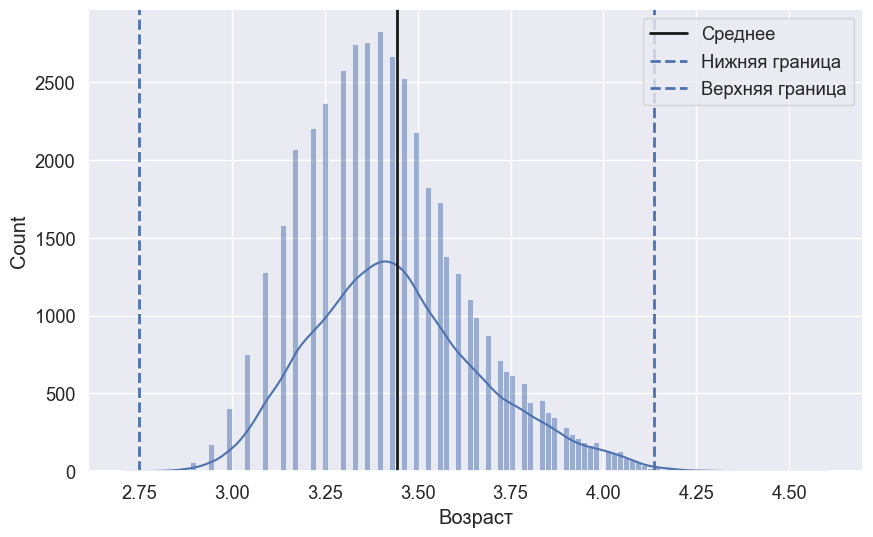

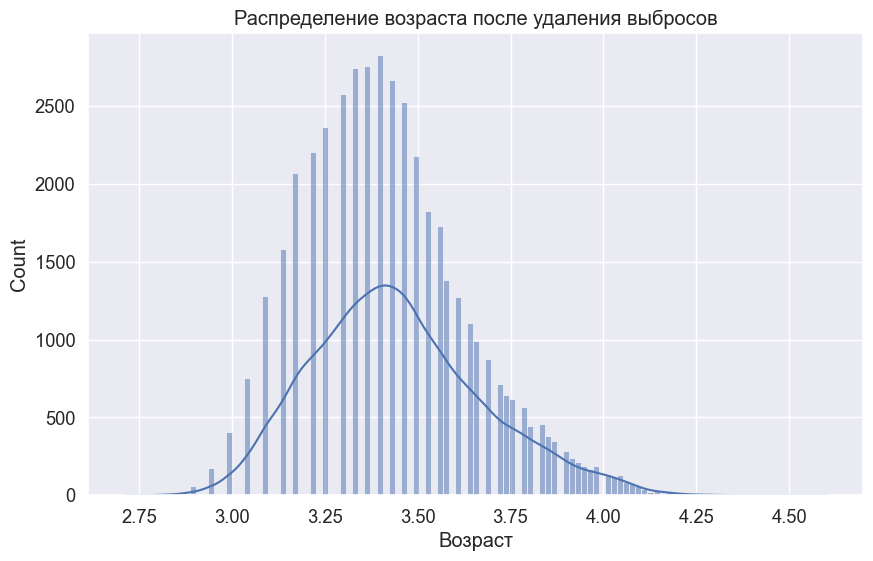

In [53]:
# Логарифмическая трансформация признака "Возраст"
log_age = np.log(valid_resumes['Возраст'])

# Построение гистограммы
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=log_age, kde=True, ax=ax)

# Линии среднего и границ интервала метода трех сигм
mean_log_age = log_age.mean()
std_log_age = log_age.std()
lower_bound = mean_log_age - 3 * std_log_age
upper_bound = mean_log_age + 3 * std_log_age

ax.axvline(mean_log_age, color='k', lw=2, label='Среднее')
ax.axvline(lower_bound, color='b', ls='--', lw=2, label='Нижняя граница')
ax.axvline(upper_bound, color='b', ls='--', lw=2, label='Верхняя граница')
plt.legend()

# Оценка асимметрии логарифмического распределения
skewness = stats.skew(log_age)
if skewness > 0:
    print("Распределение имеет положительную асимметрию (скошено вправо).")
elif skewness < 0:
    print("Распределение имеет отрицательную асимметрию (скошено влево).")
else:
    print("Распределение симметричное.")

# Выявление выбросов с помощью Z-оценки
z_scores = stats.zscore(log_age)
outliers = np.where(z_scores > 4)[0]
outlier_df = valid_resumes.iloc[outliers]

# Удаление выбросов
cleaned_df = valid_resumes.drop(outliers)

print("Таблица с выбросами:")
display(outlier_df)

# Оценка возраста кандидатов, попадающих под категорию выбросов
print("\nСоискатели с возрастом:", outlier_df['Возраст'].values, "попадают под категорию выбросов.")

# Визуализация очищенного набора данных
plt.figure(figsize=(10, 6))
sns.histplot(data=np.log(cleaned_df['Возраст']), kde=True)
plt.title("Распределение возраста после удаления выбросов")
plt.show()

ваш коммментарий здесь